In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

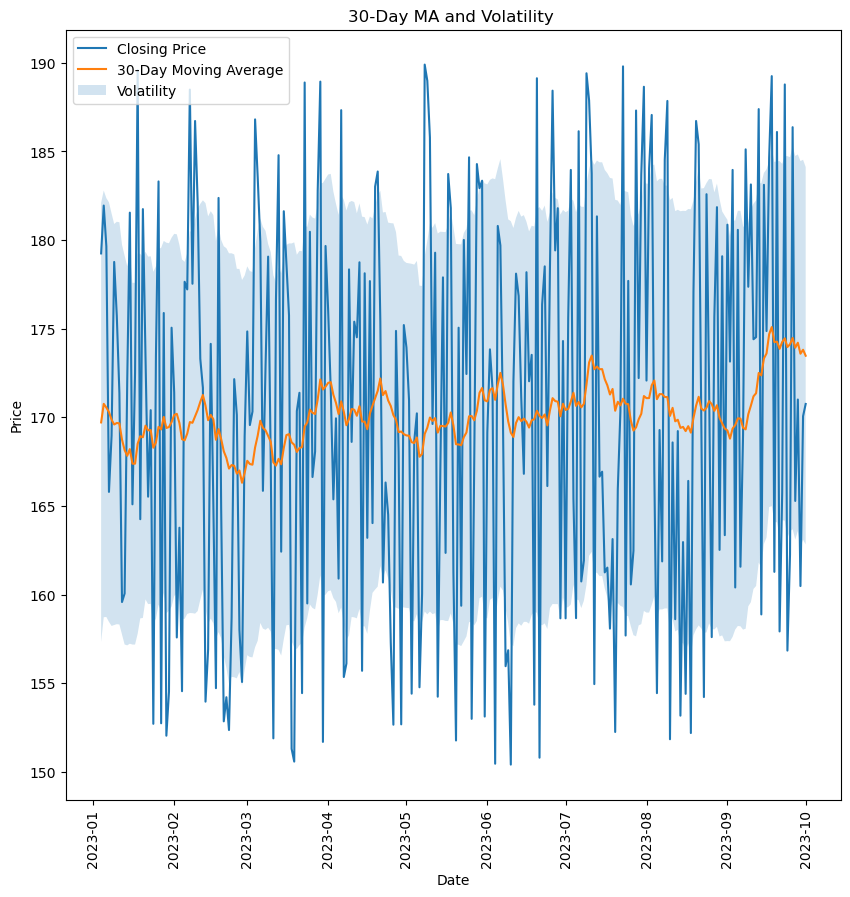

In [10]:
# ---
# Group No. 8
# 1. นนทรีย์ คำวันสา 6410450486
# 2. วินัสดา นิธิธรรมจรรยา 6410450591
# 3. อรรถวิชญ์ สิทธิ์เดชวิกรม 6410451920
# ---

group = 8 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 1 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P1/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P1/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
#clean ข้อมูล
if data.isnull().values.any():
    data.fillna(data.mean(), inplace=True)

#แปลงวันที่เป็น datetime
data['Date'] = pd.to_datetime(data['Date'])


data['30MA'] = data['Close'].rolling(window=30).mean()
data['Volatility'] = data['Close'].rolling(window=30).std()
plt.figure(figsize=(10, 10))

#เริ่มพล็อตกราฟจากองค์ประกอบที่ 30 เพื่อหลีกเลี่ยงค่า NaN
data.drop(index=range(0,29), inplace=True)
valid_data = data

plt.plot(valid_data['Date'], valid_data['Close'],label='Closing Price')
plt.plot(valid_data['Date'], valid_data['30MA'],label='30-Day Moving Average')
plt.fill_between(valid_data['Date'], valid_data['30MA'] - valid_data['Volatility'], valid_data['30MA'] + valid_data['Volatility'], alpha=0.2, label='Volatility')

#ทำชื่อของหัวกราฟ
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day MA and Volatility ')
plt.legend(loc='best',fontsize=10)
# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()